<a href="https://colab.research.google.com/github/Shivansh1969/Basic-EDA-on-Titanic-dataset/blob/main/EDA_on_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
dB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/EDA/Titanic.csv')

In [33]:
dB.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
dB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
dB.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


fixing the NULL or NaN values

In [36]:
dB.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

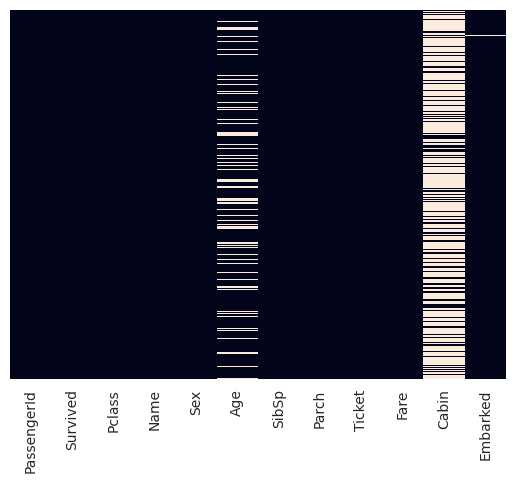

In [37]:
sns.heatmap(dB.isnull(), yticklabels=False, cbar=False)

cleaning Age and Cabin columns

/tmp/ipython-input-122381420.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=dB,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

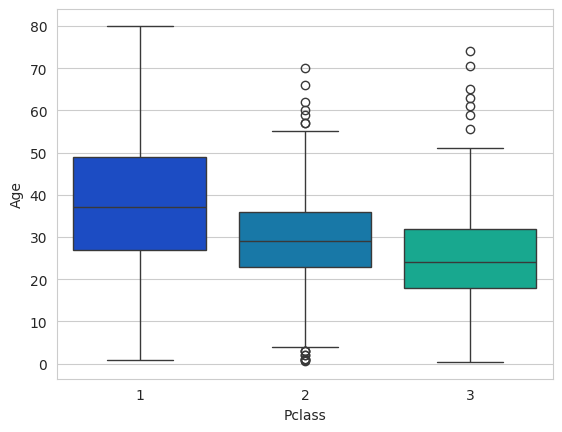

In [38]:
sns.boxplot(x='Pclass',y='Age',data=dB,palette='winter')

In [39]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age


In [40]:
dB['Age'] = dB[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipython-input-292440817.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-292440817.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

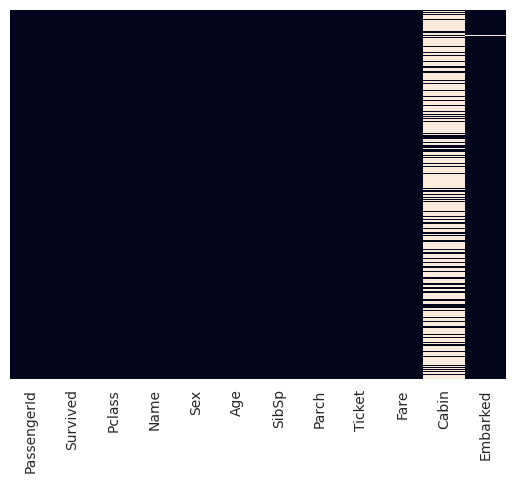

In [41]:
sns.heatmap(dB.isnull(), yticklabels=False, cbar=False)

Age column is now fixed, we filled all the NaN age values by the average age of that Pclass value

In [42]:
dB.drop('Cabin',axis=1,inplace=True)

now the Cabin column is deleted and it shows Error if you run the code multiple times

<Axes: >

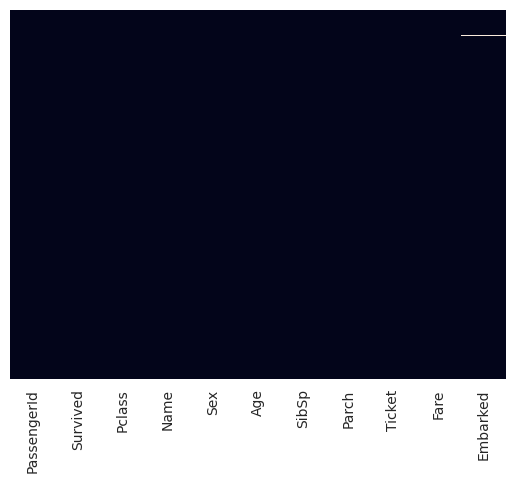

In [43]:
sns.heatmap(dB.isnull(), yticklabels=False, cbar=False)

In [44]:
dB.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Before editing the data we'll check for releations b/w different variables

<Axes: xlabel='Survived', ylabel='count'>

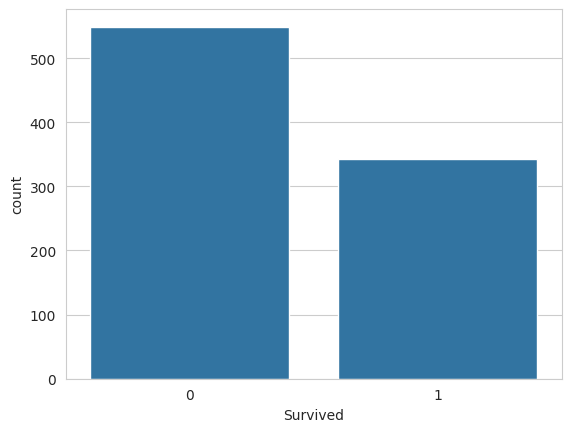

In [45]:
sns.countplot(x='Survived',data=dB)

<Axes: xlabel='Survived', ylabel='count'>

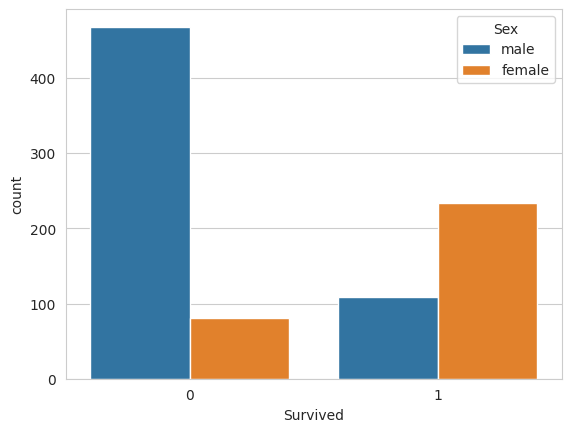

In [46]:
sns.countplot(x='Survived',hue='Sex',data=dB)

the counter plot shows that majority of the passengers who didn't survive were males as they're trying to save the women and children first

<Axes: xlabel='Survived', ylabel='count'>

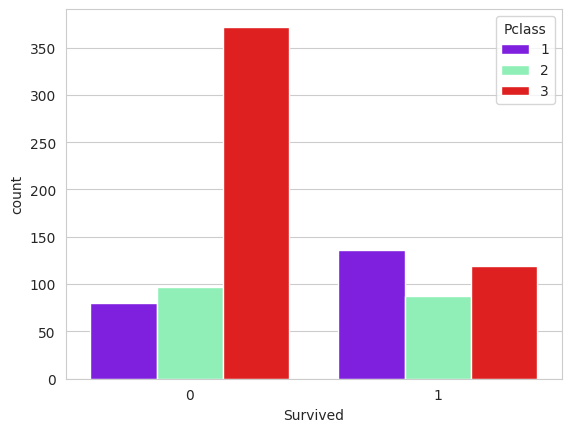

In [47]:
sns.countplot(x='Survived',hue='Pclass',data=dB,palette='rainbow')

this one shows that the majority of people who died belonged to 3rd class

<Axes: >

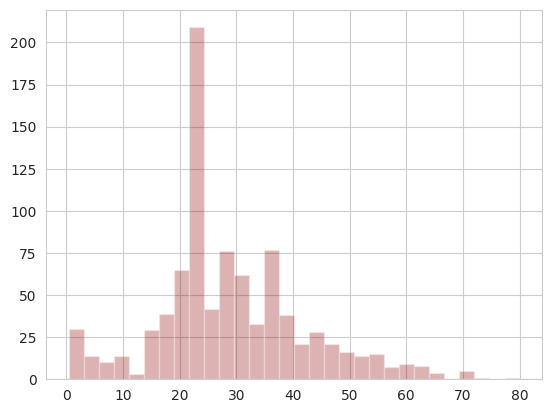

In [48]:
dB['Age'].hist(bins=30,color='darkred',alpha=0.3)


<Axes: xlabel='SibSp', ylabel='count'>

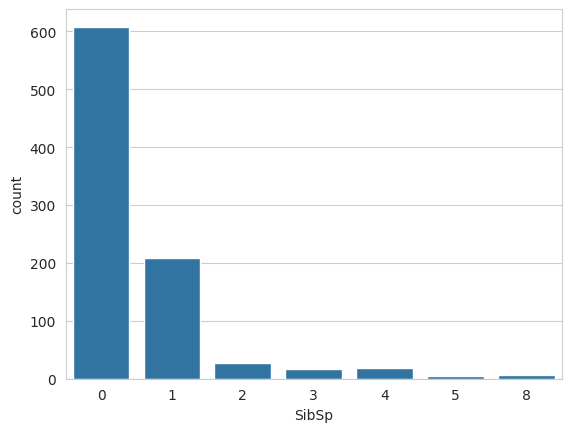

In [49]:
sns.countplot(x='SibSp',data=dB)

majority of the passengers onboard didn't have any spouse or siblings

# Removing unwanted columns and fixing the existing ones

Name,PassengerId and Ticket columns are irrelevant to our research so we will drop them

also Sex and Embarked columns will be converted into numerical columns for learning purposes

In [50]:
pd.get_dummies(dB['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


as we had 3 types of values in Embarked column get_dummies fuction made seperate columns for each type of value -1 with true and false as types of entries in them. When both the columns are false the third value is true. This will be very helpfull when we process the data through a model.

In [51]:
pd.get_dummies(dB['Sex'],drop_first=True).head()

,male
0,True
1,False
2,False
3,False
4,True


get_dummies did the same thing for Sex column by converting it's two types of entries(Male and Female) into one column(Male) and giving true(Male) or false(Female) as column entries.

In [52]:
sex = pd.get_dummies(dB['Sex'],drop_first=True)
embark = pd.get_dummies(dB['Embarked'],drop_first=True)

In [53]:
dB.drop(['Sex','Name','PassengerId','Embarked','Ticket'],axis=1,inplace=True)

In [54]:
dB.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [55]:
dB = pd.concat([dB,sex,embark],axis=1)

In [56]:
dB.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Now that our data is ready we can apply Logistic Regression to predict our target variable, Survived.

EDA is complete from this point